Dataset yang digunakan adalah Entrepreneurial competency tahun 2019 dari https://www.kaggle.com/namanmanchanda/entrepreneurial-competency-in-university-students.

Keterangan variabel-variabel dari dataset tersebut adalah sebagai berikut :
######1.EducationSector : Fakultas
######2.IndividualProject : Projek Individu
######3.Age : Umur
######4.Gender : Jenis Kelamin
######5.City : Perkotaan
######6.Influenced : Terpengaruh Orang Lain
######7.Perseverance : Ketekunan (1-5)
######8.DesireToTakeInitiative : Inisiatif (1-5)
######9.Competitiveness : Sifat Kompetitif(daya saing) (1-5)
######10.SelfReliance : Kemandirian (1-5)
######11.StrongNeedToAchieve : Kegigihan (1-5)
######12.SelfConfidence : Percaya Diri (1-5)
######13.GoodPhysicalHealth : Sehat Jasmani
######14.MentalDisorder : Gangguan Jiwa
######15.KeyTraits : Karakter dari Narasumber (Passion,Positivity,Vision,Resilience,Work ethic) (kegemaran,Berfikir Terbuka,impian,,kerja keras)
######16.ReasonsForLack : Alasan Tidak Ingin Menjadi Pengusaha
######17.y : Boolean dari ReasonsForLack

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/D03S08/DSU/main/Kelompok%206(1).csv')
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [ ]:
dc = df[['ReasonsForLack']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

In [ ]:
#untuk menghitung nilai NaN pada data
df.isna().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [ ]:
#menghilangkan Variabel ReasonsForLack
df.drop(['ReasonsForLack'],axis=1,inplace=True)
#melihat data pada variabel KeyTraits
df['KeyTraits'].unique()

array(['Passion', 'Vision', 'Resilience', 'Positivity', 'Work Ethic'],
      dtype=object)

In [ ]:
#mengubah entitas pada beberapa variabel agar menjadi numerik yg berurutan
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['IndividualProject'] = le.fit_transform(df['IndividualProject'])
df['City'] = le.fit_transform(df['City'])
df['Influenced'] = le.fit_transform(df['Influenced'])
df['MentalDisorder'] = le.fit_transform(df['MentalDisorder'])

In [ ]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,Engineering Sciences,0,19,Male,1,0,2,2,3,3,2,2,3,1,Passion,1
1,Engineering Sciences,1,22,Male,0,1,3,3,3,4,4,3,4,1,Vision,0
2,Engineering Sciences,0,18,Male,1,0,3,4,3,3,3,4,4,0,Passion,0
3,Engineering Sciences,1,20,Male,1,1,3,3,3,3,4,3,3,0,Resilience,0
4,Engineering Sciences,1,19,Male,1,1,2,3,3,3,4,3,2,1,Vision,1


In [ ]:
#melihat data pada variabel EducationSector
df['EducationSector'].unique()

array(['Engineering Sciences', 'Others',
       'Economic Sciences, Business Studies, Commerce and Law',
       'Art, Music or Design', 'Humanities and Social Sciences',
       'Medicine, Health Sciences', 'Teaching Degree (e.g., B.Ed)',
       'Mathematics or Natural Sciences', 'Language and Cultural Studies'],
      dtype=object)

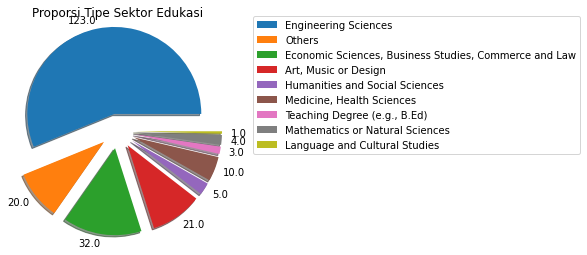

In [ ]:
from collections import Counter
data = df['EducationSector']
proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
labels = proporsion.keys()
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
plt.pie(values, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Sektor Edukasi')
plt.legend(labels,bbox_to_anchor=(1.1, 1.05))
plt.show()

Dari Piechart diatas terlihat bahwa ada 123 orang yg berjurusan Engineering Sciences; 32 orang berjurusan bisnis,commerce & law ; 10 orang berjurusan medice,health science; 5 orang berjurusan humanities & social sciences; 4 orang berjurasan matematika; 3 orang berjurusan teaching degree; 1 orang berjurusan language & culture studies; 21 orang berjurusan seni,music atau design; dan 20 orang jurusan lainnya

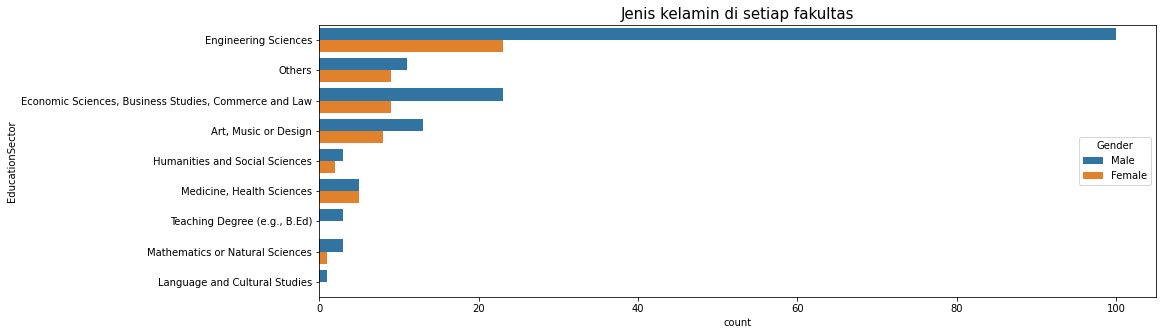

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="EducationSector", data=df, hue='Gender')
plt.title('Jenis kelamin di setiap fakultas',size=15);

dari plot di atas bisa kita lihat bahwa jenis kelamin tertinggi dari setiap edukasi adalah laki-laki, dan juga edukasi tertingginya dari beberapa data berada pada engineering sciense

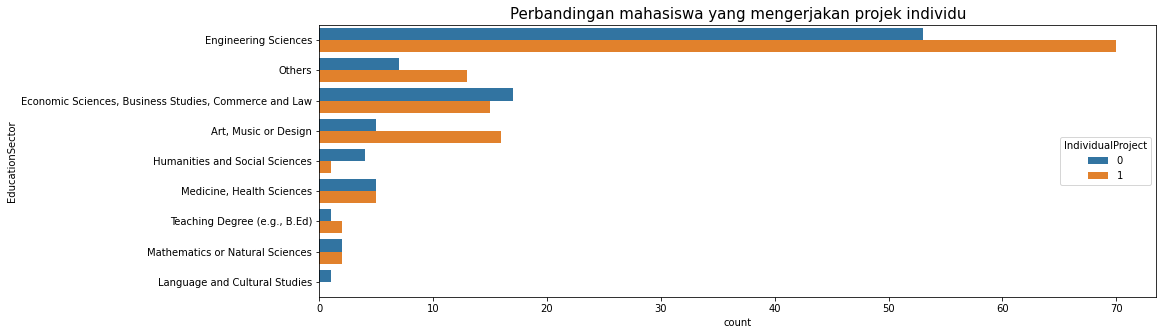

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="EducationSector", data=df, hue='IndividualProject')
plt.title('Perbandingan mahasiswa yang mengerjakan projek individu',size=15);

dari perbandingan variabel pada plot di atas, bisa disimpulkan bahwa Rata-rata lebih banyak mahasiswa yg melakukan/memiliki projek individu. untuk projek yg dikerjakan jurusan ekonomi science terlihat lebih tinggi yg tidak melakukan/memiliki projek individu diluar akademis

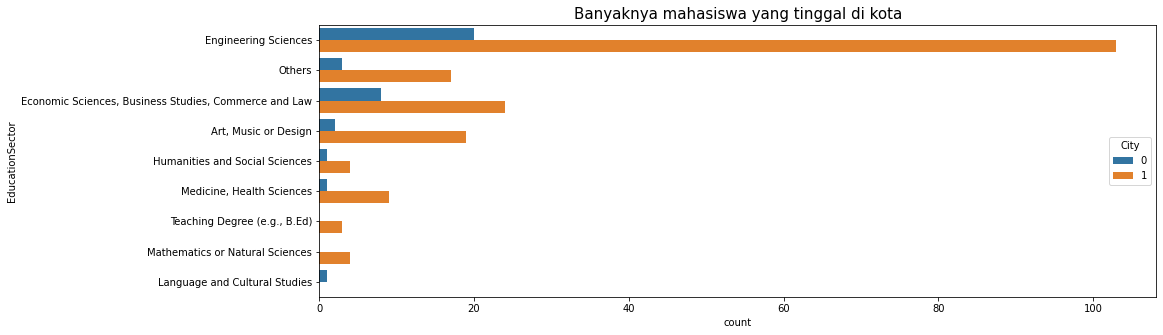

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="EducationSector", data=df, hue='City')
plt.title('Banyaknya mahasiswa yang tinggal di kota',size=15);

dari plot diatas terlihat rata-rata pelajar tinggal di lingkungan perkotaan

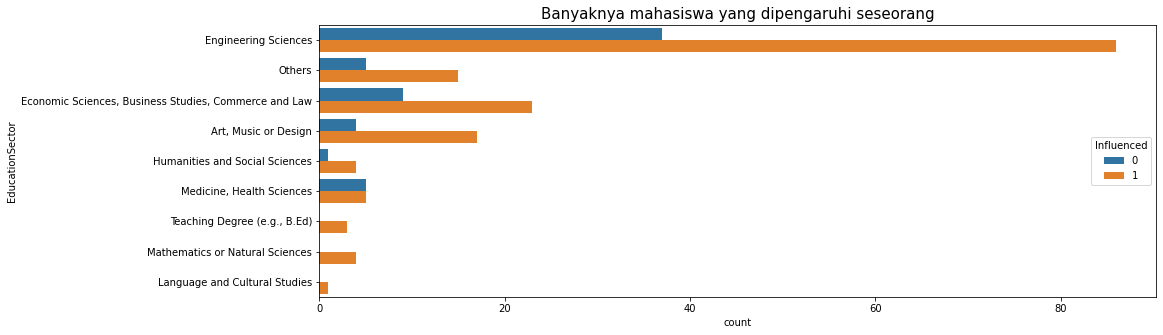

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="EducationSector", data=df, hue='Influenced')
plt.title('Banyaknya mahasiswa yang dipengaruhi seseorang',size=15);

dari plot diatas dapat disimpulkan banyak mahasiswa yang dipengaruhi orang lain (Teman/Orang tua)

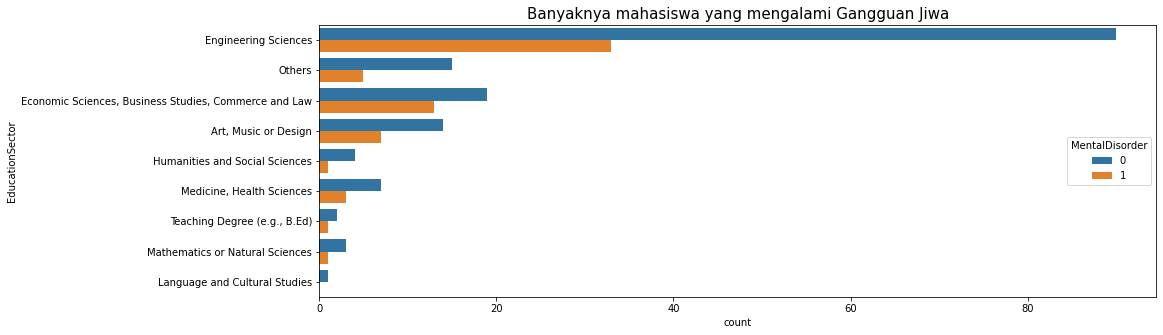

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="EducationSector", data=df, hue='MentalDisorder')
plt.title('Banyaknya mahasiswa yang mengalami Gangguan Jiwa',size=15);

dari plot diatas bisa di simpulkan bahwa rata-rata orang yg mengambil jurusan tersebut tidak mengalami stress dikarenakan jurusan yg diambil

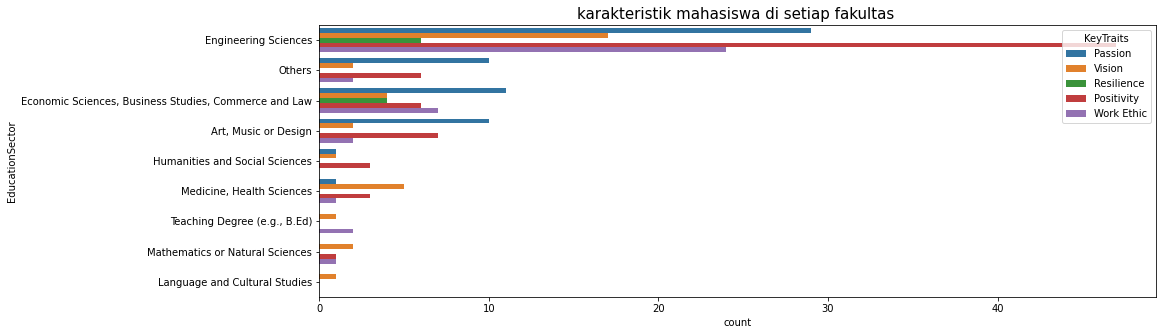

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="EducationSector", data=df, hue='KeyTraits')
plt.title('karakteristik mahasiswa di setiap fakultas ',size=15);

dari gambar diatas, mahasiswa di fakultas Engineering Sciences dan Humanities and Social Sciences memiliki karakter Positivity, mahasiswa di fakultas Economic Sciences dan Art, Music or Design dan fakultas lain memiliki karakter Passion, sedangkan mahasiswa fakultas Medicine, Health Sciences, Mathematics or Natural Sciences dan Language & Cultural Studies memiliki karakter Vision. Dan mahasiswa di fakultas Teaching Degree memiliki karakter work ethic

In [ ]:
#menginstall package baru
!pip install squarify

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string
import squarify
nltk.download('stopwords')
nltk.download('punkt')
list_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Menghapus data missing variabel
dc.dropna(inplace=True)

In [ ]:
dc['ReasonsForLack'] = dc['ReasonsForLack'].str.lower()
dc['ReasonsForLack'] = dc['ReasonsForLack'].apply(word_tokenize)
dc['ReasonsForLack'] = dc['ReasonsForLack'].apply(lambda x: [word for word in x if word not in list_stopwords])
dc['ReasonsForLack'] = dc['ReasonsForLack'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
dc['ReasonsForLack'] = dc['ReasonsForLack'].apply(lambda x : [word for word in x if len(word) > 1])

In [ ]:
dc_e=pd.DataFrame(dc['ReasonsForLack'].explode())

In [ ]:
dc_e

,ReasonsForLack
1,interested
1,want
1,work
1,corporate
1,sector
...,...
215,else
215,academic
215,pressure
217,lack


diatas adalah satu kata kunci atau keyword yang diambil dari setiap kalimat

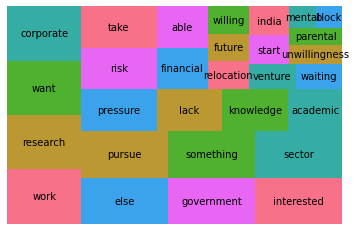

In [ ]:
dc_e=pd.DataFrame(dc_e.groupby('ReasonsForLack')['ReasonsForLack'].count().sort_values(ascending=False).head(50))
dc_e=dc_e.rename(columns={'ReasonsForLack': 'num'})

x = dc_e['num']
label = dc_e.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

Gambar diatas menunjukkan jumlah kata yang sering muncul. Semakin besar kotaknya maka semakin sering kata itu digunakan. Dari gambar diatas kita bisa mendapatkan gambaran apa alasan terbesar mahasiswa tidak ingin menjadi entrepreneur. Contohnya karena tidak ingin mengambil resiko dan tidak tertarik dibidang tersebut karena mereka ingin bekerja di perusahaan korporat

In [ ]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 1.2MB 7.5MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=650c69e238c9dfdfb55ff823a5a5a36b289da6014166a92b88dccf3dc493c000
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=1e9da7a431d210541c9c02a3885ea4d0cc239ef32e16f983350e4b48192f9c5f
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
--2021-07-02 13:16:41--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [ ]:
import warnings; warnings.simplefilter('ignore')
import umap, tau_unsup as tau
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

In [ ]:
df['KeyTraits'] = le.fit_transform(df['KeyTraits'])

In [ ]:
df_c = df.drop(['EducationSector','Gender'],axis=1)

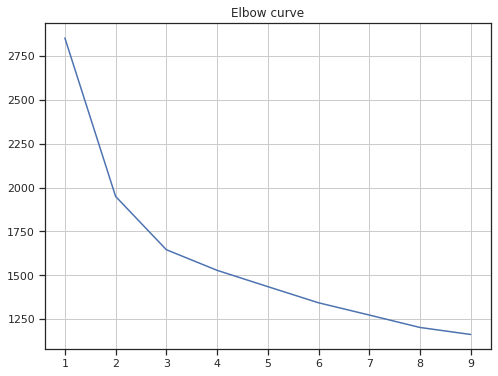

In [ ]:
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(df_c)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

Dari grafik diatas adalah grafik untuk menentukan banyaknya jumlah cluster. Kita bisa menentukan jumlah cluster dengan melihat di angka mana grafik tersebuk belok. dari gambar dapat kita ketahui bahwa grafik terssebuk berbelok secara tajam di 2 atau 3. Oleh karena itu, kita menentukan jumlah clusternya 3

array([0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0,
       2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1,
       1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1],
      dtype=int32)

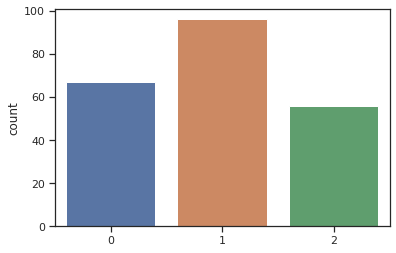

In [ ]:
kmp = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp.fit(df_c)
C_kmp = kmp.predict(df_c)

sns.countplot(C_kmp);
kmp.labels_

gambar diatas menunjukkan banyaknya anggota di setiap cluster. anggota cluster 1 lebih banyak dibandingkan clusterr 0 dan anggota cluster 0 lebih banyak dibanding culster 2

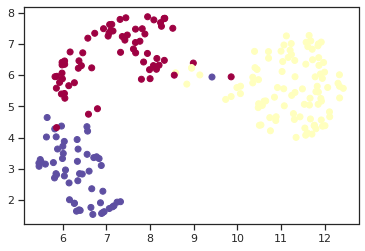

In [ ]:
X2D = umap.UMAP(random_state=42).fit_transform(df_c)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp, cmap='Spectral');

gambar diatas menunjukkan persebaran setiap clusternya

In [ ]:
df_c.columns

Index(['IndividualProject', 'Age', 'City', 'Influenced', 'Perseverance',
       'DesireToTakeInitiative', 'Competitiveness', 'SelfReliance',
       'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth',
       'MentalDisorder', 'KeyTraits', 'y'],
      dtype='object')

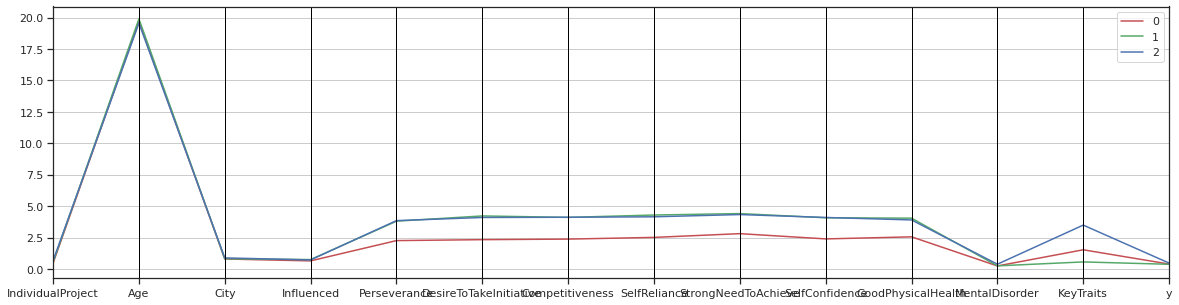

In [ ]:
plt.figure(figsize=(20,5))
cols = ['IndividualProject', 'Age', 'City', 'Influenced', 'Perseverance',
       'DesireToTakeInitiative', 'Competitiveness', 'SelfReliance',
       'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth',
       'MentalDisorder', 'KeyTraits', 'y']
dfC = pd.DataFrame(kmp.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))

plt.show()

dari grafik diatas, cluster 0 disimbolkan dengan garis berwarna merah, cluster 1 disimbolkan dengan garisa berwarna hijau dan cluster 2 disimbolkan dengan garis berwarna biru. untuk cluster 1 dan 2, setiap variabelnya memiliki kesamaan mulai dari individual project hingga mental disorder, yang membedakan hanyalah keytraitsnya. untuk cluster 0 terdapat perbedaan dengan cluster 1 dan 2, yakni sifat perseverence sampai kesehatan fisik cenderung lebih rendah dibandingkan dengan cluster 1 dan 2, dan keytraitsnya pun berbeda dengan cluster 1 dan 2.

In [ ]:
df_c['cluster'] = kmp.labels_
df_c.head()

,IndividualProject,Age,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y,cluster
0,0,19,1,0,2,2,3,3,2,2,3,1,0,1,0
1,1,22,0,1,3,3,3,4,4,3,4,1,3,0,2
2,0,18,1,0,3,4,3,3,3,4,4,0,0,0,1
3,1,20,1,1,3,3,3,3,4,3,3,0,2,0,0
4,1,19,1,1,2,3,3,3,4,3,2,1,3,1,0


melalui data diatas, kita dapat melihat setiap data dikategorikan sebagai cluster nomor berapa

Kesimpulan :
Dari data yang ada dapat kita tarik kesimpulan bahwa kebanyakan mahasiswa berjenis kelamin laki-laki, tidak memiliki gangguan jiwa serta memiliki individual project. Jumlah mahasiswa terbanyak berada di fakultas Engineering Sciences. Karakter mahasiswa dari setiap fakultas pun beragam. Dari 219 mahasiswa yang disurvey, 91 mahasiswa tidak ingin menjadi entrepreneur. Alasan terbesarnya adalah mereka tidak tertarik dibidang tersebut dan ingin bekerja di perusahaan korporat, selain itu mereka juga tidak berani untuk mengambil resiko.